In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
import warnings
warnings.simplefilter("ignore")

## Загружаем данные

In [3]:
pd.set_option('display.max_columns', 100)

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

Определим признаковое простанство.

In [5]:
target = "SalePrice"

In [6]:
features_num = df.select_dtypes(include='number').columns
features_num = features_num[~features_num.str.contains('(?:Id|SalePrice)')]
features_num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [7]:
features_cat = df.select_dtypes(include='object').columns
features_cat = features_cat[~features_cat.str.contains('(?:Id|SalePrice)')]
features_cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
df[features_cat] = df[features_cat].astype('category')

Посмотрим на пропущенные значения.

In [9]:
na_columns = df.isna().sum(axis=0)

In [10]:
na_columns_num = na_columns[features_num] / df.shape[0]
na_columns_num[na_columns_num > 0]

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [11]:
na_columns_cat = na_columns[features_cat] / df.shape[0]
na_columns_cat[na_columns_cat > 0]

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [12]:
# Удаляем столбцы, где слишком много пропущенных значений

features_cat = features_cat.drop(na_columns_cat[na_columns_cat > 0.3].index)
features_cat

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Посмотрим на корреляции.

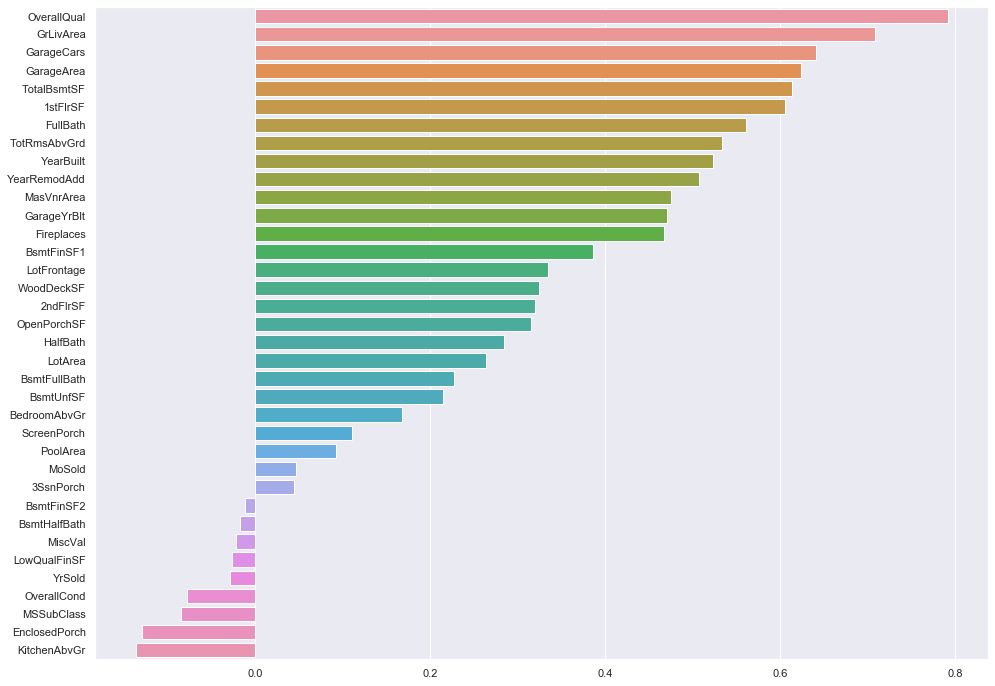

In [13]:
mean = df[features_num].mean(axis=0)
corr = df[features_num].fillna(mean).corrwith(df[target]).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 12), ncols=1)
_ = sns.barplot(y=corr.index, x=corr, ax=ax)

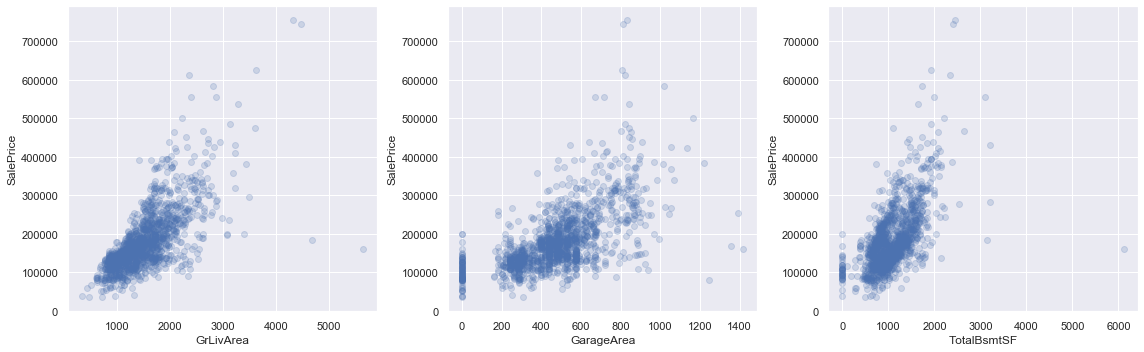

In [14]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["GrLivArea", "GarageArea", "TotalBsmtSF"]):
    axs[i].scatter(df[feature], df[target], alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
plt.tight_layout()

In [15]:
# удаляем, как слабо кореллирующий и с большим количеством пропусков

features_num = features_num.drop('LotFrontage')

Рассмотрим целевую переменную.

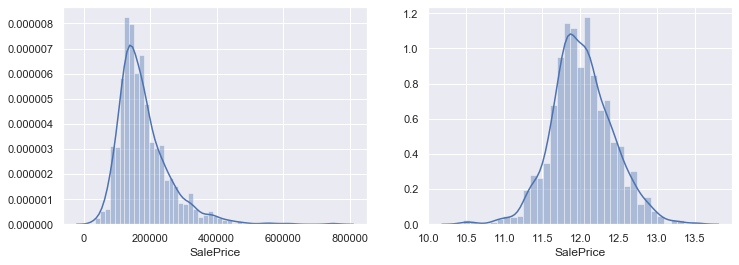

In [16]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2)

_ = sns.distplot(df[target], ax=ax[0])
_ = sns.distplot(np.log(1 + df[target]), ax=ax[1])

In [17]:
target_log = target + '_log'
df[target_log] = np.log1p(df[target])

In [18]:
df[target_log].isna().any()

False

Заполним пропуски средним. В случае категориальных признаков заменим `np.nan` на `Unknown` для `OneHotEncoder`.

In [19]:
df.fillna(df.loc[:, features_num].mean(), inplace=True)

for cat in features_cat:
    df[cat] = df[cat].cat.add_categories("Unknown").fillna("Unknown")

Разобъем на обучающую и тестовую выборки.

In [20]:
from sklearn.model_selection import train_test_split

features = np.hstack((features_num, features_cat))
features = pd.Index(features)

X, y, y_log = df[features], df[target].values, df[target_log].values

X_train, X_test, y_train, y_test, y_train_log, y_test_log = \
    train_test_split(X, y, y_log, test_size=0.3, random_state=10)

X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

## Построение модели

Отшкалируем признаки.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features_num])
X_test_scaled = scaler.transform(X_test[features_num])

Обучим модель для целевой переменной `target`.

In [22]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.model_selection import cross_val_score

In [23]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [24]:
model = Ridge().fit(X_train_scaled, y_train)
-rmse_scorer(model, X_test_scaled, y_test)

31889.050412085802

In [25]:
model = Ridge()
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring=rmse_scorer)

print("Cross validation scores:\n\t", "\n\t".join(map("{:.4f}".format, cv_scores)), sep='')
print("Mean CV RMSE = {:.4f}".format(np.mean(-cv_scores)))

Cross validation scores:
	-38550.6485
	-44955.1974
	-30562.7193
	-34285.2403
	-71828.7709
	-23598.8927
	-45700.1793
	-52847.0504
	-25572.7571
	-29856.3790
Mean CV RMSE = 39775.7835


Обучим модель для целевой переменной `target_log`.

In [26]:
def mean_squared_error_exp(y_true, y_pred):
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

exp_scorer = make_scorer(
    mean_squared_error_exp,
    greater_is_better=False
)

In [27]:
model = Ridge().fit(X_train_scaled, y_train_log)
-exp_scorer(model, X_test_scaled, y_test_log)

26616.51680100603

In [28]:
model = Ridge()
cv_scores = cross_val_score(model, X_train_scaled, y_train_log, cv=10, scoring=exp_scorer)

print("Cross validation scores:\n\t", "\n\t".join(map("{:.4f}".format, cv_scores)), sep='')
print("Mean CV RMSE = {:.4f}".format(np.mean(-cv_scores)))

Cross validation scores:
	-35538.3308
	-30929.0191
	-26917.8095
	-32079.8911
	-210051.4939
	-22415.8246
	-71972.4619
	-42747.2875
	-21912.8990
	-25001.2525
Mean CV RMSE = 51956.6270


<span style="color:red;font-weight:bold">Внимание:</span> полный провал на `CV`. Временно продолжим с `target`.

Подберем значение гиперпараметров.

Best alpha = 297.6351


/Users/v.bugaevskii/miniconda3/envs/ml-py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0, 0.5, 'CV score')

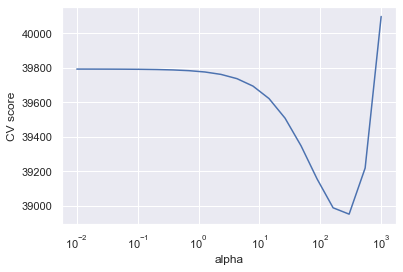

In [29]:
from sklearn.model_selection import GridSearchCV

alpha = np.logspace(-2, 3, 20)

searcher = GridSearchCV(Ridge(), [{"alpha": alpha}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = {:.4f}".format(best_alpha))

plt.plot(alpha, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [30]:
model = Ridge(best_alpha).fit(X_train_scaled, y_train)
-rmse_scorer(model, X_test_scaled, y_test)

31667.309151292888

Объединим все в один `Pipeline`.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features_num),
])

model = Pipeline([
    ('transform',  transformer),
    ('regression', Ridge(best_alpha))
])

model.fit(X_train, y_train)

-rmse_scorer(model, X_test, y_test)

31667.309151292888

Добавим one-hot кодирование для категориальных признаков.

In [32]:
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features_num),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'), features_cat),
])

model = Pipeline([
    ('transform',  transformer),
    ('regression', Ridge(best_alpha))
])

model.fit(X_train, y_train)

-rmse_scorer(model, X_test, y_test)

27698.25080978973

Попробуем Lasso регрессию.

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   25.2s finished
/Users/v.bugaevskii/miniconda3/envs/ml-py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best alpha = 162.3777
CPU times: user 866 ms, sys: 101 ms, total: 967 ms
Wall time: 25.5 s


Text(0, 0.5, 'CV score')

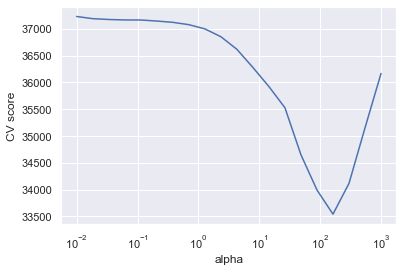

In [33]:
%%time

# WARNING: работает очень долго

X_train_transformed = transformer.fit_transform(X_train)

alpha = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Lasso(), [{"alpha": alpha}], scoring=rmse_scorer, cv=10, n_jobs=4, verbose=1)
searcher.fit(X_train_transformed, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = {:.4f}".format(best_alpha))

plt.plot(alpha, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [35]:
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features_num),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'), features_cat),
])

model = Pipeline([
    ('transform',  transformer),
    ('regression', Lasso(best_alpha))
])

model.fit(X_train, y_train)

-rmse_scorer(model, X_test, y_test)

24348.936535635545

Посмотрим на распределение ошибок.

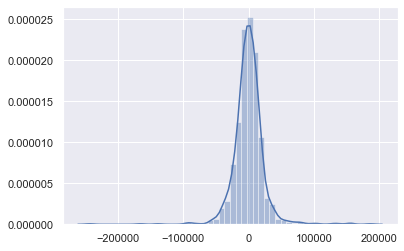

In [36]:
error = y_train - model.predict(X_train)
sns.distplot(error)

In [37]:
error = error ** 2
mask = error < np.quantile(error, 0.95)

In [38]:
transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features_num),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'), features_cat),
])

model = Pipeline([
    ('transform',  transformer),
    ('regression', Lasso(best_alpha))
])

model.fit(X_train[mask], y_train[mask])

-rmse_scorer(model, X_test, y_test)

23774.692461610528

Вернемся к целевой переменной `target_log`.

In [39]:
transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features_num),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'), features_cat),
])

model = Pipeline([
    ('transform',  transformer),
    ('regression', Ridge())
])

model.fit(X_train[mask], y_train_log[mask])
y_pred_log = model.predict(X_test)

mean_squared_error_exp(y_test_log, y_pred_log)

21447.458681474283

In [40]:
cv_scores = cross_val_score(model, X_train[mask], y_train_log[mask], cv=10, scoring=exp_scorer)

print("Cross validation scores:\n\t", "\n\t".join(map("{:.4f}".format, cv_scores)), sep='')
print("Mean CV RMSE = {:.4f}".format(np.mean(-cv_scores)))

Cross validation scores:
	-19707.2201
	-17372.5802
	-17970.8151
	-15859.9710
	-13302.5675
	-15570.7207
	-18568.6317
	-16529.1425
	-18058.7207
	-16975.3043
Mean CV RMSE = 16991.5674


Подберем гиперпараметры.

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.0s


Best alpha = 7.8476
CPU times: user 452 ms, sys: 25.7 ms, total: 478 ms
Wall time: 6.98 s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.8s finished


Text(0, 0.5, 'CV score')

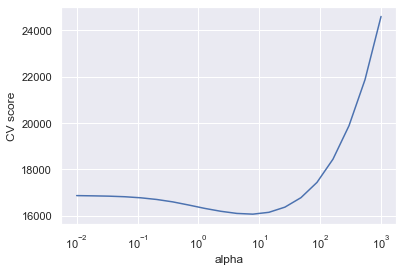

In [41]:
%%time

# WARNING: работает долго

X_train_transformed = transformer.fit_transform(X_train)

alpha = np.logspace(-2, 3, 20)

searcher = GridSearchCV(Ridge(), [{"alpha": alpha}], scoring=rmse_scorer, cv=10, n_jobs=4, verbose=1)
searcher.fit(X_train_transformed[mask], y_train[mask])

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = {:.4f}".format(best_alpha))

plt.plot(alpha, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [42]:
transformer = ColumnTransformer([
    ('scaling', StandardScaler(), features_num),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'), features_cat),
])

model = Pipeline([
    ('transform',  transformer),
    ('regression', Ridge(best_alpha))
])

model.fit(X_train[mask], y_train_log[mask])
y_pred_log = model.predict(X_test)

mean_squared_error_exp(y_test_log, y_pred_log)

21176.862218327562